# Scikit-learn 시작하기

## 학습 목표
1. **Scikit-learn** 라이브러리의 기본 구조와 사용법을 이해할 수 있다
2. 내장 데이터셋(iris, digits 등)을 **로드하고 탐색**할 수 있다
3. 머신러닝의 기본 워크플로우(**데이터 준비 → 모델 학습 → 예측 → 평가**)를 이해할 수 있다
4. **train_test_split**을 사용하여 학습/테스트 데이터를 분리할 수 있다
5. 기본적인 분류기(Classifier)를 학습시키고 예측 결과를 확인할 수 있다

## 주요 내용
- Scikit-learn 소개 및 설치
- 내장 데이터셋 사용법 (`sklearn.datasets`)
- 기본 머신러닝 모델 학습 과정
- 모델 평가 지표 (accuracy, precision, recall 등)
- fit(), predict() 메서드 사용법

## 사이킷런으로 LinearRegression 모델을 사용해보자

y = wx + b (weights)

w값과 b값을 주어진 데이터를 이용해서 최적화 시키는 문제(지도학습)

multi-variable linear regression  
y = w1x1 + w2x2 + b


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

**x 데이터 생성**

In [2]:
n=100
# x = [0,1,2,3,4,5,6,7,8,9]
# 1차원 데이터 : numpy.ndarry + range(10)
x = np.arange(n)
print(x)
print(type(x))
print(x.shape)  #10행

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
<class 'numpy.ndarray'>
(100,)


In [ ]:
# 2차원 데이터
# reshape()의 '-1'은 
# "원래 배열의 길이와 남은 차원으로 부터 추정"
# 배열의 차원을 변경시키는 함수
# 뒤에 1(열의 갯수)고정
# 10행 -> 10행 1열
# reshape 은 행,열의 모양을 변경할떄 사용한다. (주료 머신러닝 모델에 데이터를 넣을때)
x = np.arange(n).reshape(-1, 1)
print(x)
print(x.shape)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]
 [94]
 [95]
 [96]
 [97]
 [98]
 [99]]
(100, 1)


**y데이터 생성**

In [4]:
# y = 2x+1
y = (2*x + 1)

In [5]:
print(y)
print(y.shape)

[[  1]
 [  3]
 [  5]
 [  7]
 [  9]
 [ 11]
 [ 13]
 [ 15]
 [ 17]
 [ 19]
 [ 21]
 [ 23]
 [ 25]
 [ 27]
 [ 29]
 [ 31]
 [ 33]
 [ 35]
 [ 37]
 [ 39]
 [ 41]
 [ 43]
 [ 45]
 [ 47]
 [ 49]
 [ 51]
 [ 53]
 [ 55]
 [ 57]
 [ 59]
 [ 61]
 [ 63]
 [ 65]
 [ 67]
 [ 69]
 [ 71]
 [ 73]
 [ 75]
 [ 77]
 [ 79]
 [ 81]
 [ 83]
 [ 85]
 [ 87]
 [ 89]
 [ 91]
 [ 93]
 [ 95]
 [ 97]
 [ 99]
 [101]
 [103]
 [105]
 [107]
 [109]
 [111]
 [113]
 [115]
 [117]
 [119]
 [121]
 [123]
 [125]
 [127]
 [129]
 [131]
 [133]
 [135]
 [137]
 [139]
 [141]
 [143]
 [145]
 [147]
 [149]
 [151]
 [153]
 [155]
 [157]
 [159]
 [161]
 [163]
 [165]
 [167]
 [169]
 [171]
 [173]
 [175]
 [177]
 [179]
 [181]
 [183]
 [185]
 [187]
 [189]
 [191]
 [193]
 [195]
 [197]
 [199]]
(100, 1)


In [7]:
# numpy의 random.seed()함수에 seed값 설정
# 난수 발생기에 14라는 고정값을 입력하면, 항상 동일한 난수가 발생
np.random.seed(14)

# 10개의 난수를 생성
# 0~1사이의 난수가 생성
randValue = np.random.random(n)*3
print(randValue)

randValue = randValue.reshape(-1,1)
y = (2*x + 1)

# 2x+1 + 난수
y = y + randValue
y

[1.54183003 2.31949516 2.61128306 0.02414085 0.92920778 2.87281122
 1.53935014 0.95485327 1.61759981 0.66376483 2.41944407 1.02676388
 1.61666655 0.01762136 2.01945743 0.63007279 2.79767278 1.12273425
 2.25725677 2.28941701 2.61149837 0.33033353 0.90027594 1.4247173
 2.01881016 0.7727773  2.10345396 1.97100018 0.54602327 0.96618898
 2.66261237 0.25004748 2.23969236 0.18705015 2.19444338 2.22753406
 1.22374744 2.974149   1.3564119  0.56963563 1.05487942 2.144435
 1.07230609 0.15485566 0.94775701 2.99641383 0.86371457 1.38538761
 2.20580433 2.83103685 0.52620793 0.63726413 0.39743284 0.62604358
 2.98706383 0.7399375  0.33015948 1.50696071 1.36836545 2.20347069
 1.86283062 1.86321068 0.4505179  1.61482364 0.36104173 0.45907657
 1.35053567 1.28721704 2.20098624 0.22071465 0.83635749 0.49588132
 1.52426442 1.73775346 1.91582378 0.64207711 1.25273295 1.40044254
 0.24920765 1.71081872 0.68555269 0.10718916 2.89358783 0.22397984
 2.19144072 1.50788977 0.2778325  1.57184806 1.30265388 1.6440492

array([[  2.54183003],
       [  5.31949516],
       [  7.61128306],
       [  7.02414085],
       [  9.92920778],
       [ 13.87281122],
       [ 14.53935014],
       [ 15.95485327],
       [ 18.61759981],
       [ 19.66376483],
       [ 23.41944407],
       [ 24.02676388],
       [ 26.61666655],
       [ 27.01762136],
       [ 31.01945743],
       [ 31.63007279],
       [ 35.79767278],
       [ 36.12273425],
       [ 39.25725677],
       [ 41.28941701],
       [ 43.61149837],
       [ 43.33033353],
       [ 45.90027594],
       [ 48.4247173 ],
       [ 51.01881016],
       [ 51.7727773 ],
       [ 55.10345396],
       [ 56.97100018],
       [ 57.54602327],
       [ 59.96618898],
       [ 63.66261237],
       [ 63.25004748],
       [ 67.23969236],
       [ 67.18705015],
       [ 71.19444338],
       [ 73.22753406],
       [ 74.22374744],
       [ 77.974149  ],
       [ 78.3564119 ],
       [ 79.56963563],
       [ 82.05487942],
       [ 85.144435  ],
       [ 86.07230609],
       [ 87

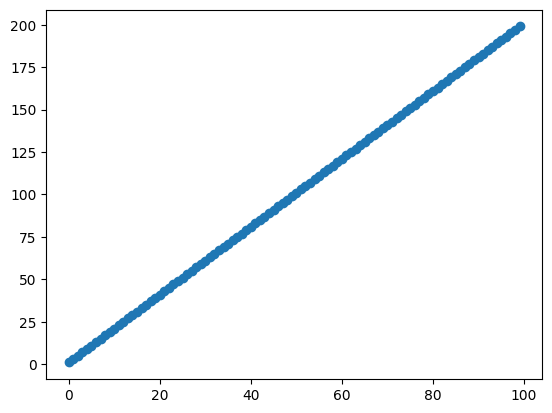

In [6]:
# matplotlib으로 그려보기
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
plt.show()

## 모델의 선언, fit(학습), predict(예측)

In [9]:
# STEP 1. 모델 선언
model = LinearRegression()

In [10]:
# STEP 2. 학습
# x데이터(문제)와 y데이터(레이블) -> 지도학습
model.fit(x, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
# 모델에서 찾은 기울기(w)
print(model.coef_)
# 모델에서 찾은 바이어스(b) 
print(model.intercept_)

[[1.99936674]]
[2.46282525]


In [12]:
# STEP 3. 예측
prediction = model.predict([[20.0],[21.0]])

In [13]:
prediction

array([[42.45015996],
       [44.4495267 ]])

## **train_test_split**  
scikit-learn의 train_test_split은 데이터를 나누어 주는 함수이다.  

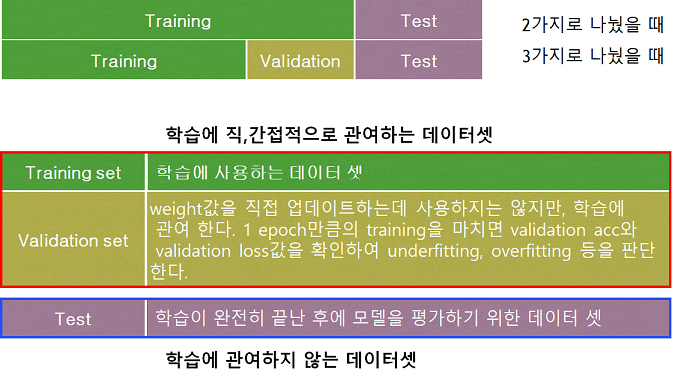

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

X = [[0,1],[2,3],[4,5],[6,7],[8,9]]
Y = [0,1,2,3,4]

# 데이터(X)만 넣었을 경우
# train : test = 8 : 2 
# X 데이터셋(리스트)을 나누는데 test-> 0.2, train->0.8 
# random_state -> random.seed값으로 이해
X_train, X_test = train_test_split(X, test_size=0.2, random_state=123)
# X_train : [[0,1],[6,7],[8,9],[2,3]]
# X_test : [[4,5]]

print(X_train)
print(X_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[[2, 3]]


In [15]:
# 데이터(X)와 레이블(Y)을 넣었을 경우
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=321)
# X_train : [[4,5],[0,1],[6,7]]
# Y_train : [2,0,3]
# X_test : [[2,3],[8,9]]
# Y_test : [1,4]
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[2, 3], [0, 1], [4, 5], [8, 9]]
[1, 0, 2, 4]
[[6, 7]]
[3]


## 당뇨병 1년후 병의 진전도 예측하는 모델

### load_diabetes()함수를 사용하여 데이터 준비하기

In [16]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [17]:
# dict 타입으로 출력
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

### 데이터셋의 특성을 확인해 본다

In [ ]:
# toy dataset인 diabetes를 설명하는 Description을 출력합니다.
from sklearn.datasets import load_diabetes
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

**Age** : 나이  
**Sex** : 성별  
**Body mass index(BMI)** : 체질량 지수, 사람의 비만도를 나타내는 지수로, 체중과 키의 관계로 계산된다.  
**Average blood pressure** : 평균혈압  
**S1, S2, S3, S4, S5, S6** : six blood serum measurements   

In [19]:
# 데이터프레임에서 columns로 사용할 수 있는 리스트
features = diabetes.feature_names
print('feature names:', features)

feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [20]:
# data와 target의 shape를 확인해본다.
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [22]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [23]:
# target 데이터를 dataFrame에 함께 저장하기
df['target'] = diabetes.target

In [24]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [27]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [26]:
df.shape #(442, 11)

(442, 11)

In [28]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.268604e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


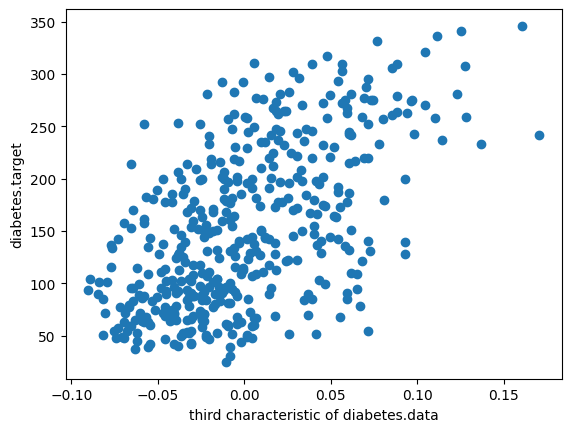

In [29]:
import matplotlib.pyplot as plt

X = diabetes.data
Y = diabetes.target

# bmi를 scatter 그래프로 그려보자
plt.scatter(X[:,2],Y)
plt.xlabel('third characteristic of diabetes.data')
plt.ylabel('diabetes.target')
plt.show()

<Figure size 3000x1200 with 0 Axes>

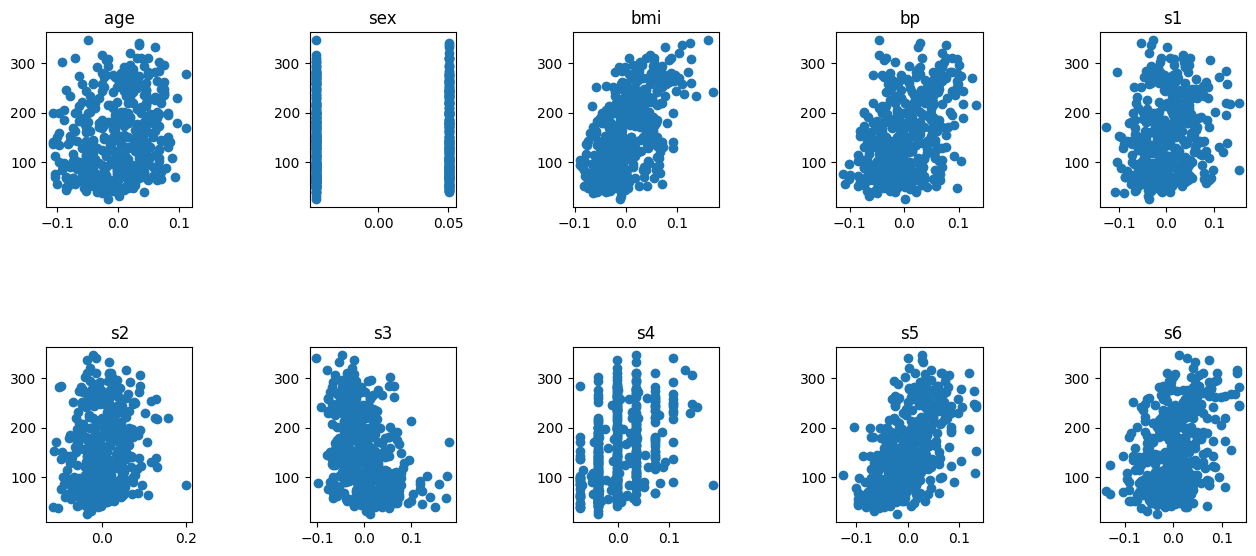

In [30]:
# 1개의 figure에 10개의 subplot를 그려서, 변수들과 당뇨병(y)의 대략적이 관계를 파악.
# y ~ age, y ~ sex, y ~ bmi, ...
plt.figure(figsize=(30,12))
fig, ax = plt.subplots(2, 5, figsize=(30,7))  

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.8, wspace=0.8, hspace=0.8)
# ax: 3x4 형태의 2차원 배열(ndarray)
ax_flat = ax.flatten()  # 3*4 행렬을 순차적으로 불러오기 위해 flatten 함수 사용
for i in range(len(features[0:10])):
    subplot = ax_flat[i]
    subplot.scatter(X[:, i], Y)
    subplot.set_title(features[i])
plt.show()

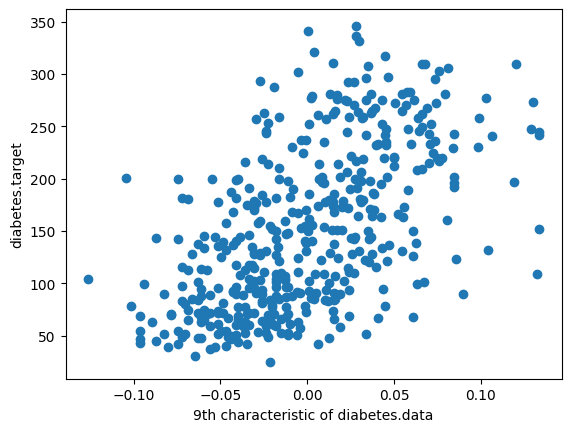

In [31]:
import matplotlib.pyplot as plt

X = diabetes.data
Y = diabetes.target


plt.scatter(X[:,8],Y)
plt.xlabel('9th characteristic of diabetes.data')
plt.ylabel('diabetes.target')
plt.show()

In [32]:
# bmi column을 가지고 linear_regression을 한다.
bmi = X[:, np.newaxis, 2] # data에서 'bmi' 컬럼만 선택

In [33]:
bmi.shape

(442, 1)

In [34]:
# scikit-learn의 Linear Regression은 훈련 데이터 세트가 반드시 2차원 배열이어야 함.
# 2차원 배열 형태의 훈련 데이터 세트만 사용하기 때문에
print('bmi.shape:',bmi.shape)
print('bmi[:5] =',bmi[:5])

bmi.shape: (442, 1)
bmi[:5] = [[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [35]:
from sklearn.model_selection import train_test_split

# 전체 데이터가 442개
#train : test = 8(353) : 2(89)
#bmi_train, bmi_test = train_test_split(bmi, test_size=0.2, random_state=99)
#y_train, y_test = train_test_split(Y, test_size=0.2, random_state=99)

bmi_train, bmi_test, y_train, y_test = train_test_split(bmi,Y, test_size=0.2, random_state=99)

In [36]:
print(bmi_train.shape)
print(bmi_test.shape)

(353, 1)
(89, 1)


In [37]:
print(y_train.shape)
print(y_test.shape)

(353,)
(89,)


In [38]:
from sklearn.linear_model import LinearRegression

# STEP 1. 모델 선언
model = LinearRegression()

In [39]:
# STEP 2. 학습진행, 학습데이터(X, Y)
model.fit(bmi_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [40]:
print('coefficients:', model.coef_)
print('intercept:', model.intercept_)

coefficients: [975.08825788]
intercept: 153.40202437029825


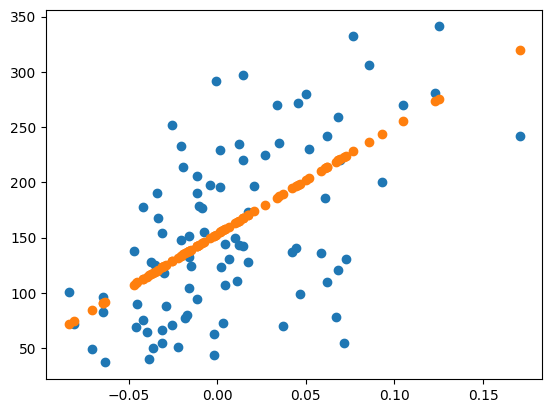

In [41]:
y_pred = model.predict(bmi_test)
plt.scatter(bmi_test, y_test) # 실제 값
plt.scatter(bmi_test, y_pred)
plt.show()

## bmi와 s5가 diabets값과 상관관계가 있어 보여서 X를 2개를 사용해서 학습

In [130]:
data = df[['bmi','s5']]
print(data)
print(data.shape)

          bmi        s5
0    0.061696  0.019907
1   -0.051474 -0.068332
2    0.044451  0.002861
3   -0.011595  0.022688
4   -0.036385 -0.031988
..        ...       ...
437  0.019662  0.031193
438 -0.015906 -0.018114
439 -0.015906 -0.046883
440  0.039062  0.044529
441 -0.073030 -0.004222

[442 rows x 2 columns]
(442, 2)


In [131]:
from sklearn.model_selection import train_test_split

#data_train, data_test = train_test_split(data, test_size=0.2, random_state=99)
#y_train, y_test = train_test_split(Y, test_size=0.2, random_state=99)
data_train, data_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=99)

In [132]:
print(data_train.shape)
print(data_test.shape)

(353, 2)
(89, 2)


In [133]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(data_train, y_train)

LinearRegression()

In [134]:
# x1 : bmi, w1
# x2 : s5,  w2
# target -> 정답 

# y(예측값) = w1x1 + w2x2 + b
# multi-variable linear regression, 지도학습, 신경망을 이용한 방법론
# hidden layer가 없는 신경망
print('coefficients:', model2.coef_)
print('intercept:', model2.intercept_)

coefficients: [704.67572069 597.58233621]
intercept: 154.27924655260355


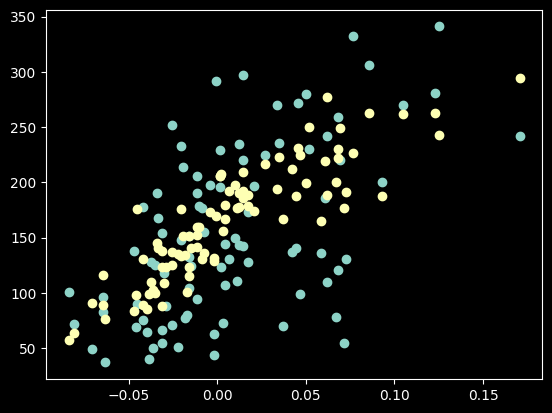

In [135]:
y_pred = model2.predict(data_test)
plt.scatter(bmi_test, y_test) # 실제 값
plt.scatter(bmi_test, y_pred)
plt.show()